In [ ]:
# https://www.kaggle.com/code/wonjinkim1010/mnist-0-991-cnn-model

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)


In [2]:
import os
for dirname, _, filenames in os.walk('D:\Prayag Files\Coding\Python\Projects\Image Recognition'):
    for filename in filenames:
        print(os.path.join(dirname, filename))


D:\Prayag Files\Coding\Python\Projects\Image Recognition\cats n dogs.ipynb
D:\Prayag Files\Coding\Python\Projects\Image Recognition\MNISTCNN.ipynb
D:\Prayag Files\Coding\Python\Projects\Image Recognition\submission.csv
D:\Prayag Files\Coding\Python\Projects\Image Recognition\train_x
D:\Prayag Files\Coding\Python\Projects\Image Recognition\train_y
D:\Prayag Files\Coding\Python\Projects\Image Recognition\input\sampleSubmission.csv
D:\Prayag Files\Coding\Python\Projects\Image Recognition\input\test1.zip
D:\Prayag Files\Coding\Python\Projects\Image Recognition\input\train.zip
D:\Prayag Files\Coding\Python\Projects\Image Recognition\test1\1.jpg
D:\Prayag Files\Coding\Python\Projects\Image Recognition\test1\10.jpg
D:\Prayag Files\Coding\Python\Projects\Image Recognition\test1\100.jpg
D:\Prayag Files\Coding\Python\Projects\Image Recognition\test1\1000.jpg
D:\Prayag Files\Coding\Python\Projects\Image Recognition\test1\10000.jpg
D:\Prayag Files\Coding\Python\Projects\Image Recognition\test1\100

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt #for plotting
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [2]:
train = pd.read_csv("train.csv")
test = pd.read_csv("test.csv")

In [3]:
print(train.shape)
print(train.info())
train.head()

(42000, 785)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42000 entries, 0 to 41999
Columns: 785 entries, label to pixel783
dtypes: int64(785)
memory usage: 251.5 MB
None


,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [4]:
print(test.shape)
print(test.info())
test.head()

(28000, 784)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28000 entries, 0 to 27999
Columns: 784 entries, pixel0 to pixel783
dtypes: int64(784)
memory usage: 167.5 MB
None


,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [5]:
y_train = train["label"]


x_train = train.drop(labels=["label"], axis = 1)

1    4684
7    4401
3    4351
9    4188
2    4177
6    4137
0    4132
4    4072
8    4063
5    3795
Name: label, dtype: int64

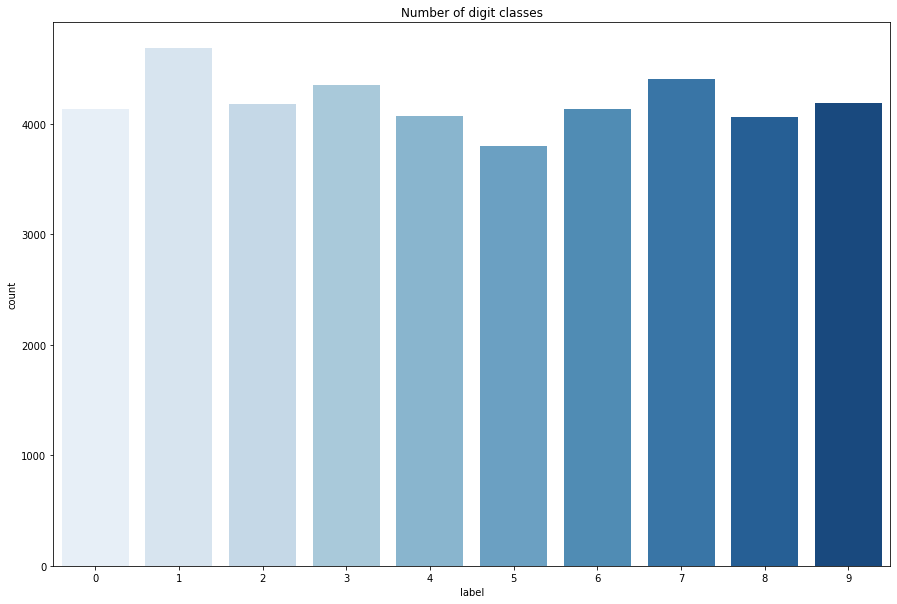

In [8]:
plt.figure(figsize=(15,10))
g = sns.countplot(y_train, palette='Blues')
plt.title("Number of digit classes")
y_train.value_counts()

In [9]:
x_train = x_train / 255.0 
test = test / 255.0
print("x_train shape", x_train.shape)
print("test shape", test.shape)

x_train shape (42000, 784)
test shape (28000, 784)


In [10]:
x_train = x_train.values.reshape(-1, 28, 28, 1)
test = test.values.reshape(-1, 28, 28, 1)
print("x_train shape", x_train.shape)
print("test shape", test.shape)

x_train shape (42000, 28, 28, 1)
test shape (28000, 28, 28, 1)


In [11]:
from keras.utils.np_utils import to_categorical

y_train = to_categorical(y_train, num_classes = 10)

In [12]:
from sklearn.model_selection import train_test_split
X_train, X_val, Y_train, Y_val = train_test_split(x_train, 
                                                  y_train, 
                                                  test_size = 0.1, 
                                                  random_state = 5)

In [13]:
print("x_train shape",X_train.shape)
print("x_test shape",X_val.shape)
print("y_train shape",Y_train.shape)
print("y_test shape",Y_val.shape)

x_train shape (37800, 28, 28, 1)
x_test shape (4200, 28, 28, 1)
y_train shape (37800, 10)
y_test shape (4200, 10)


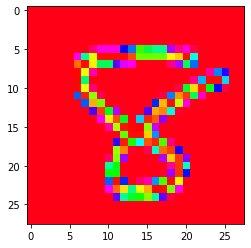

In [16]:
plt.imshow(X_train[1][:,:,0],cmap='hsv_r')
plt.show()

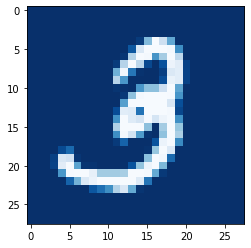

In [18]:
plt.imshow(X_train[0][:,:,0],cmap='Blues_r')
plt.show()

In [19]:
import os
from sklearn.metrics import confusion_matrix
import itertools

from keras.utils.np_utils import to_categorical # convert to one-hot-encoding
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D
from tensorflow.keras.optimizers import RMSprop,Adam

from keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import ReduceLROnPlateau

In [20]:
model = Sequential()

# 3.1 Conv2D layer(컨볼루션 레이어)
model.add(Conv2D(filters = 8, 
                 kernel_size = (5,5),
                 padding = 'Same', 
                 activation ='relu', 
                 input_shape = (28,28,1)))

In [21]:
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(0.25))

In [23]:
model.add(Conv2D(filters = 16, 
                 kernel_size = (3,3),
                 padding = 'Same', 
                 activation ='softmax'))

In [24]:
model.add(MaxPool2D(pool_size=(2,2), 
                    strides=(2,2)))
model.add(Dropout(0.25))

In [25]:
model.add(Flatten())

In [26]:
model.add(Dense(256, activation = "relu"))
model.add(Dropout(0.5))
model.add(Dense(10, activation = "softmax"))

In [27]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 8)         208       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 14, 14, 8)        0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 14, 14, 8)         0         
                                                                 
 conv2d_1 (Conv2D)           (None, 14, 14, 16)        1168      
                                                                 
 conv2d_2 (Conv2D)           (None, 14, 14, 16)        2320      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 7, 7, 16)         0         
 2D)                                                    

In [28]:
optimizer = Adam(lr = 0.001,
                beta_1 = 0.9,
                beta_2 = 0.999)

In [29]:
datagen = ImageDataGenerator(
        featurewise_center = False,  # set input mean to 0 over the dataset
        samplewise_center = False,  # set each sample mean to 0
        featurewise_std_normalization = False,  # divide inputs by std of the dataset
        samplewise_std_normalization = False,  # divide each input by its std
        zca_whitening = False,  # dimesion reduction
        rotation_range = 15,  # randomly rotate images in the range 5 degrees
        zoom_range = 0.01, # Randomly zoom image 10%
        width_shift_range = 0.1,  # randomly shift images horizontally 10%
        height_shift_range = 0.1,  # randomly shift images vertically 10%
        horizontal_flip = False,  # randomly flip images
        vertical_flip = False)  # randomly flip images

datagen.fit(X_train)

In [31]:
model.compile(optimizer = optimizer, 
              loss = "categorical_crossentropy", 
              metrics=["accuracy"])

#for better result increase the epochs
epochs = 10
batch_size = 250


# training
history = model.fit_generator(datagen.flow(X_train,
                                           Y_train, 
                                           batch_size = batch_size),
                              epochs = epochs, 
                              validation_data = (X_val,Y_val), 
                              validation_steps = X_val.shape[0] // batch_size)

Epoch 1/10
152/152 [==============================] - 29s 189ms/step - loss: 0.5557 - accuracy: 0.8250 - val_loss: 0.1621 - val_accuracy: 0.9514
Epoch 2/10
152/152 [==============================] - 32s 208ms/step - loss: 0.3692 - accuracy: 0.8843 - val_loss: 0.1219 - val_accuracy: 0.9607
Epoch 3/10
152/152 [==============================] - 35s 230ms/step - loss: 0.3079 - accuracy: 0.9033 - val_loss: 0.1072 - val_accuracy: 0.9667
Epoch 4/10
152/152 [==============================] - 42s 275ms/step - loss: 0.2704 - accuracy: 0.9160 - val_loss: 0.0926 - val_accuracy: 0.9717
Epoch 5/10
152/152 [==============================] - 36s 239ms/step - loss: 0.2434 - accuracy: 0.9249 - val_loss: 0.0835 - val_accuracy: 0.9738
Epoch 6/10
152/152 [==============================] - 40s 264ms/step - loss: 0.2237 - accuracy: 0.9307 - val_loss: 0.0734 - val_accuracy: 0.9771
Epoch 7/10
152/152 [==============================] - 43s 284ms/step - loss: 0.2024 - accuracy: 0.9371 - val_loss: 0.0687 - val_ac

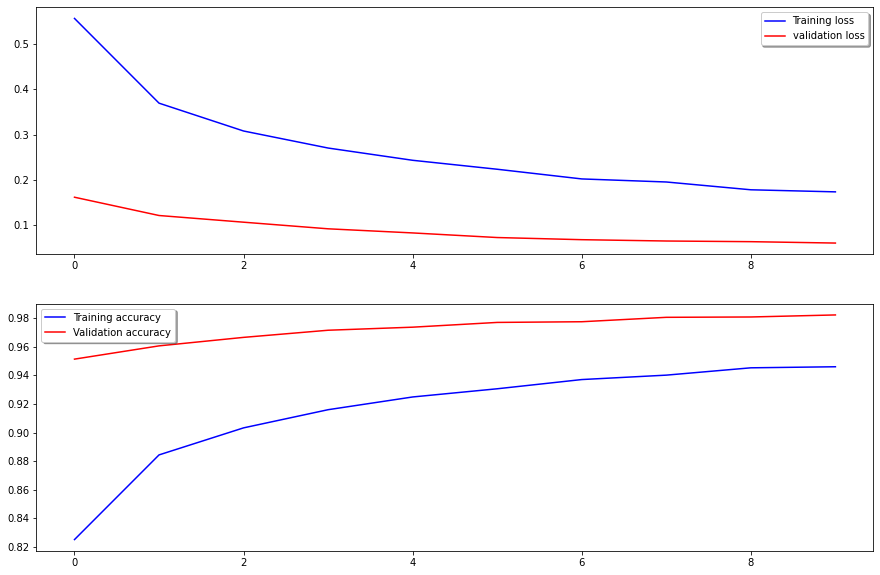

In [32]:
# plot 1: Loss
fig, ax = plt.subplots(2,1, figsize=(15, 10))
ax[0].plot(history.history['loss'], color='b', label="Training loss")
ax[0].plot(history.history['val_loss'], color='r', label="validation loss",axes =ax[0])
legend = ax[0].legend(loc='best', shadow=True)

# plot 2: accuracy
ax[1].plot(history.history['accuracy'], color='b', label="Training accuracy")
ax[1].plot(history.history['val_accuracy'], color='r',label="Validation accuracy")
legend = ax[1].legend(loc='best', shadow=True)

132/132 [==============================] - 3s 13ms/step


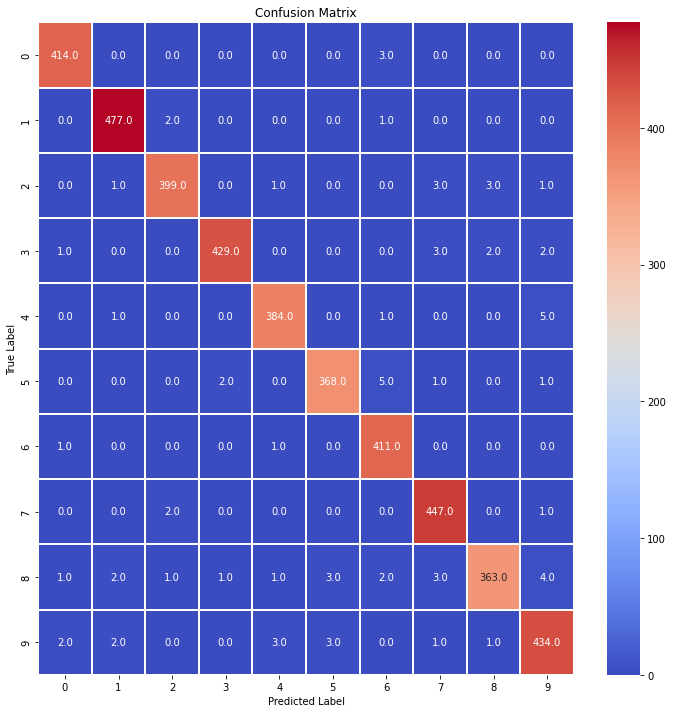

In [33]:
import seaborn as sns
# Predict the values from the validation dataset
Y_pred = model.predict(X_val)

# Convert predictions classes to one hot vectors 
Y_pred_classes = np.argmax(Y_pred,axis = 1) 

# Convert validation observations to one hot vectors
Y_true = np.argmax(Y_val,axis = 1) 

# compute the confusion matrix
confusion_mtx = confusion_matrix(Y_true, Y_pred_classes) 

# plot the confusion matrix
f,ax = plt.subplots(figsize=(12, 12))
sns.heatmap(confusion_mtx, annot=True, 
            linewidths=0.01,cmap="coolwarm",
            linecolor="white", 
            fmt= '.1f',ax=ax)

plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()

132/132 [==============================] - 1s 11ms/step


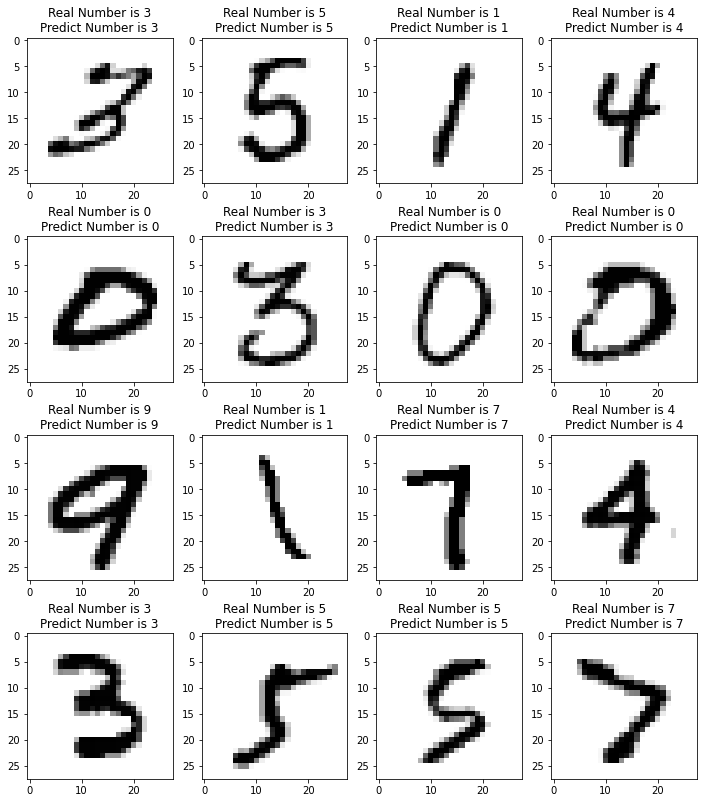

In [34]:
y_pred = model.predict(X_val)
X_test__ = X_val.reshape(X_val.shape[0], 28, 28)

fig, axis = plt.subplots(4, 4, figsize=(12, 14))
for i, ax in enumerate(axis.flat):
    ax.imshow(X_test__[i], cmap='binary')
    ax.set(title = f"Real Number is {Y_val[i].argmax()}\nPredict Number is {y_pred[i].argmax()}");

In [35]:
test.shape

(28000, 28, 28, 1)

In [37]:

results = model.predict(test)
results = np.argmax(results,axis = 1)
submission = pd.read_csv('sample_submission.csv')

875/875 [==============================] - 7s 8ms/step


In [38]:
submission['Label'] = results
submission.to_csv('submission.csv', header=True, index=False)